<a href="https://colab.research.google.com/github/sandeepss2020/Neural_Network-DL/blob/main/2147130_CAC2_NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [96]:
heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


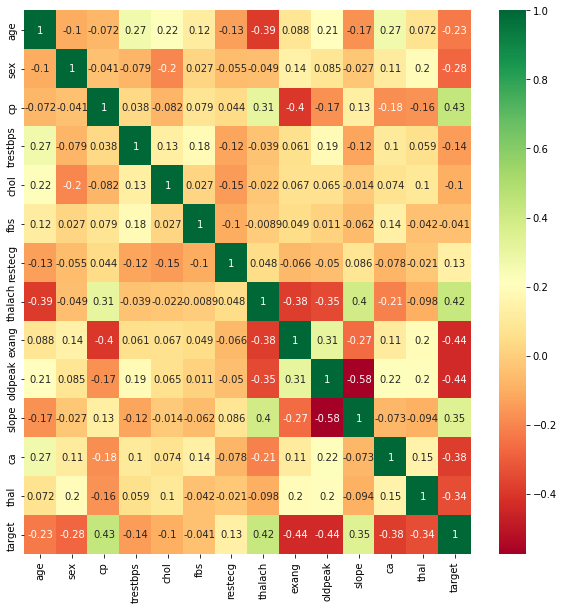

In [97]:
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def show_correlation_graph(heart: pd.DataFrame, figsize: Tuple):
    plt.figure(figsize=figsize)
    corrmat = heart.corr()
    top_corr_features = corrmat.index
    sns.heatmap(heart[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()

show_correlation_graph(heart,(10,10))

In [98]:
heart = heart.drop(columns=['trestbps','chol','restecg'],axis=1)

In [99]:
features = heart.drop('target', axis=1)
label = heart[['target']]

In [100]:
X = features
y = label
X = pd.get_dummies(X).values
y = pd.get_dummies(y).values

In [101]:
print(X)
print(y)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [102]:
X_train , X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state= 4)

In [110]:
learning_rate = 0.25
iterations = 1500  #5000 can be changed
N = y_train.size

# number of input features
input_size = 10

# number of hidden layers neurons
hidden_size = 8

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])
print(results)

Empty DataFrame
Columns: [mse, accuracy]
Index: []


In [111]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
print(W1)
# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 
print(W2)

[[ 0.66579325  0.35763949 -0.77270015 -0.00419192  0.31066799 -0.36004278
   0.13275579  0.05427426]
 [ 0.00214572 -0.08730011  0.21651309  0.60151869 -0.48253284  0.51413704
   0.11431507  0.22256881]
 [-0.56830111  0.06756844  0.7422685  -0.53990244 -0.98886414 -0.87168615
   0.13303508  1.19248367]
 [ 0.56184563  0.83631111  0.04957461  0.69899819 -0.13562399  0.30660209
  -0.13365859 -0.27465451]
 [ 0.06635415 -0.23807101  0.65423654  0.09750664  0.20010499 -0.16881617
   0.62823613 -0.36598475]
 [ 0.33011578 -0.17543595 -0.46971668 -0.24466861 -0.40229557 -0.10634882
  -0.16957012  0.15608497]
 [ 0.28257633 -0.07371013 -0.01295267  0.1445471  -0.26993954  0.35408001
   0.42111237  0.1017904 ]
 [ 1.19735183  0.45872947 -0.05613624 -0.18109022 -0.11609113 -0.25086445
   0.56439258 -0.34890502]
 [-0.04056109 -0.26464804  0.52309143 -0.70927801 -0.18124959 -0.06095285
   0.15967821  0.23045145]
 [-0.10789495  0.49453623  0.15737689  1.23382553 -0.75416074  0.31030033
  -0.52256627 -0.

In [112]:
def sigmoid(x):
  # binary_sig = ( 1 - np.exp(-x))/( 1 + np.exp(-x))
  # return binary_sig
  # return 1 / (1 + np.exp(-x))
  return ( 1 - np.exp(-x))/( 1 + np.exp(-x))


def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()



In [113]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer|
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

print(mse)
print(results)

<ipython-input-112-4edbbda8c191>:5: RuntimeWarning: overflow encountered in exp
  return ( 1 - np.exp(-x))/( 1 + np.exp(-x))
<ipython-input-112-4edbbda8c191>:5: RuntimeWarning: invalid value encountered in true_divide
  return ( 1 - np.exp(-x))/( 1 + np.exp(-x))


nan
           mse  accuracy
0     0.141722  0.004878
1     0.526263  0.000000
2     0.732376  0.000000
3     1.015197  0.000000
4     1.161721  0.000000
...        ...       ...
1495       NaN  1.000000
1496       NaN  1.000000
1497       NaN  1.000000
1498       NaN  1.000000
1499       NaN  1.000000

[1500 rows x 2 columns]


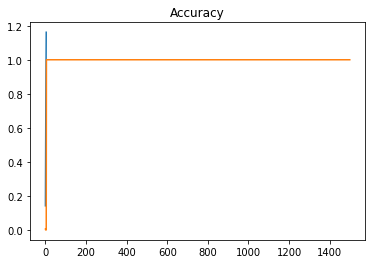

In [114]:
results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")

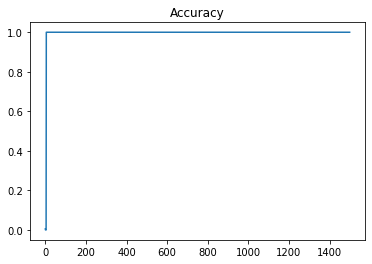

In [115]:
results.accuracy.plot(title="Accuracy")

In [116]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 1.0


Heart Dataset CNN

In [2]:
from math import exp
from random import seed
from random import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

seed(1)

In [3]:
tf.debugging.set_log_device_placement(True)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True))
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Device mapping: no known devices.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17588174820736064065
 xla_global_id: -1]

#BPN MODEL

In [4]:
class BPN:
  def __init__(self, train_data, test_data, n_hidden, l_rate, n_epochs):
    self.train_data = train_data
    self.test_data = test_data
    self.n_hidden = n_hidden
    self.l_rate = l_rate
    self.n_epochs = n_epochs
    self.network = list()
    self.accuracy_epochs = list()

  def initialize_network(self):
    n_inputs = len(self.train_data[0]) - 1
    n_outputs = len(set([row[-1] for row in self.train_data]))

    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(self.n_hidden)]
    self.network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(self.n_hidden + 1)]} for i in range(n_outputs)]
    self.network.append(output_layer)

  def activate(self, weights, inputs):
    activation = weights[-1]

    for i in range(len(weights)-1):
      activation += weights[i] * inputs[i]
    return activation

  def transfer(self, activation):
    return 1.0 / (1.0 + exp(-activation))

  def forward_propagate(self, row):
    inputs = row
    for layer in self.network:
      new_inputs = []
      for neuron in layer:
        activation = self.activate(neuron['weights'], inputs)
        neuron['output'] = self.transfer(activation)
        new_inputs.append(neuron['output'])
      inputs = new_inputs
    return inputs

  def transfer_derivative(self, output):
    return output * (1.0 - output)

  def backward_propagate_error(self, expected):
    for i in reversed(range(len(self.network))):
      layer = self.network[i]
      errors = list()
      if i != len(self.network)-1:
        for j in range(len(layer)):
          error = 0.0
          for neuron in self.network[i + 1]:
            error += (neuron['weights'][j] * neuron['delta'])
          errors.append(error)
      else:
        for j in range(len(layer)):
          neuron = layer[j]
          errors.append(neuron['output'] - expected[j])
      for j in range(len(layer)):
        neuron = layer[j]
        neuron['delta'] = errors[j] * self.transfer_derivative(neuron['output'])

  def update_weights(self, row):
    for i in range(len(self.network)):
      inputs = row[:-1]
      if i != 0:
        inputs = [neuron['output'] for neuron in self.network[i - 1]]
      for neuron in self.network[i]:
        for j in range(len(inputs)):
          neuron['weights'][j] -= self.l_rate * neuron['delta'] * inputs[j]
        neuron['weights'][-1] -= self.l_rate * neuron['delta']

  def train_network(self):
    self.initialize_network()
    n_outputs = len(set([row[-1] for row in self.train_data]))

    for epoch in range(self.n_epochs):
      sum_error = 0
      for row in self.train_data:
        outputs = self.forward_propagate(row)
        expected = [0 for i in range(n_outputs)]
        expected[int(row[-1])] = 1
        sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
        self.backward_propagate_error(expected)
        self.update_weights(row)
      accuracy_score = self.get_accuracy_score()
      self.accuracy_epochs.append(accuracy_score)
      print('>epoch=%d, lrate=%.3f, MSE=%f, accuracy=%f' % (epoch + 1, self.l_rate, sum_error / len(self.train_data), accuracy_score))

  def predict(self, row):
    outputs = self.forward_propagate(row)
    return outputs.index(max(outputs))
  
  def show_predictions(self):
    self.y_pred = []
    for row in self.test_data:
      prediction = self.predict(row)
      self.y_pred.append(prediction)
      prefix = '+' if row[-1] == prediction else '-'
      print('%s Expected=%d, Got=%d' % (prefix, row[-1], prediction))
  
  def get_accuracy_score(self):
    score = 0
    self.y_pred = []
    for row in self.test_data:
      prediction = self.predict(row)
      self.y_pred.append(prediction)
      score += 1 if row[-1] == prediction else 0
    return (score / len(self.test_data)) * 100

CNN MODEL 1D

In [5]:
cnn_model = keras.Sequential()
cnn_model.add(layers.Conv1D(32, (3,), activation='relu', padding="same", input_shape=(13, 1))) # input shape is (no_of_features, 1)
cnn_model.add(layers.MaxPooling1D((2,)))
cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.Conv1D(64, (3,), activation='relu'))
cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(4)) # no of classes

cnn_model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job

In [6]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


#RNN  MODEL 1D

In [7]:
rnn_model = keras.Sequential()
rnn_model.add(layers.Embedding(input_dim=1000, output_dim=64))
rnn_model.add(layers.GRU(256, return_sequences=True))
rnn_model.add(layers.SimpleRNN(128))
rnn_model.add(layers.Dense(4)) # no of classes

rnn_model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:local

In [8]:
rnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


CNN 2D

In [24]:
INPUT_IMAGE_SIZE = 128

cnn_model2 = keras.Sequential()
cnn_model2.add(layers.Convolution2D(32, (3, 3), input_shape=(INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE, 3), activation='relu'))
cnn_model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(layers.Convolution2D(32, (3, 3), activation='relu'))
cnn_model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(layers.Flatten())
cnn_model2.add(layers.Dense(units=96, activation='relu'))
cnn_model2.add(layers.Dropout(0.40))
cnn_model2.add(layers.Dense(units=32, activation='relu'))
cnn_model2.add(layers.Dense(10)) # no of classes

cnn_model2.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:

In [25]:
cnn_model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


RNN_2D

In [17]:
model = keras.Sequential()
model.add(tf.keras.Input(shape=(128, 128, 3)))
model.add(layers.Flatten())
model.add(layers.Reshape((256, 192), input_shape=(49152, )))
model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [144]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
# data

In [146]:
data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [147]:
X = data.iloc[:, :-1]
Y = data["target"]

In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
len(x_train)

717

In [149]:
x_train["target"] = y_train.values
x_test["target"] = y_test.values

In [150]:
bpn = BPN(x_train.to_numpy(), x_test.to_numpy(), 3, 0.02, 100)
bpn.train_network()

>epoch=1, lrate=0.020, MSE=0.669077, accuracy=51.298701
>epoch=2, lrate=0.020, MSE=0.506542, accuracy=51.298701
>epoch=3, lrate=0.020, MSE=0.501584, accuracy=51.298701
>epoch=4, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=5, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=6, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=7, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=8, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=9, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=10, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=11, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=12, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=13, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=14, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=15, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=16, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=17, lrate=0.020, MSE=0.501590, accuracy=51.298701
>epoch=18, lrate=0.020, MSE=0.501590, ac

In [151]:
bpn.get_accuracy_score()

51.298701298701296

In [152]:
x_train = x_train.iloc[:, :-1]
x_test = x_test.iloc[:, :-1]

In [153]:
x_train.shape

(717, 13)

Train the Cnn model

In [159]:
cnn_history = cnn_model.fit(x_train.to_numpy()[:,:,None], y_train.to_numpy(), epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
23/23 [==============================] - 1s 20ms/step - loss: 7.4093 - accuracy: 0.5119 - val_loss: 1.6183 - val_accuracy: 0.5519
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 3.7912 - accuracy: 0.5384 - val_loss: 1.3872 - val_accuracy: 0.5584
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 2.2272 - accuracy: 0.5607 - val_loss: 0.8053 - val_accuracy: 0.6461
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 1.8163 - accuracy: 0.5676 - val_loss: 0.6339 - val_accuracy: 0.6396
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 1.5684 - accuracy: 0.5676 - val_loss: 0.6151 - val_accuracy: 0.6396
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 1.3829 - accuracy: 0.5509 - val_loss: 0.8215 - val_accuracy: 0.5130
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 1.1236 - accuracy: 0.5565 - val_loss: 0.6685 - val_accuracy: 0.5877
Epoch 8/100


Train the RNN dataset

In [160]:
rnn_history = rnn_model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
23/23 [==============================] - 6s 93ms/step - loss: 0.6667 - accuracy: 0.7015 - val_loss: 0.3544 - val_accuracy: 0.8604
Epoch 2/100
23/23 [==============================] - 2s 66ms/step - loss: 0.3418 - accuracy: 0.8605 - val_loss: 0.2844 - val_accuracy: 0.8864
Epoch 3/100
23/23 [==============================] - 2s 71ms/step - loss: 0.2181 - accuracy: 0.9261 - val_loss: 0.2172 - val_accuracy: 0.9123
Epoch 4/100
23/23 [==============================] - 2s 68ms/step - loss: 0.1837 - accuracy: 0.9358 - val_loss: 0.2161 - val_accuracy: 0.9156
Epoch 5/100
23/23 [==============================] - 1s 65ms/step - loss: 0.1077 - accuracy: 0.9721 - val_loss: 0.2217 - val_accuracy: 0.9188
Epoch 6/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0799 - accuracy: 0.9721 - val_loss: 0.1598 - val_accuracy: 0.9221
Epoch 7/100
23/23 [==============================] - 2s 65ms/step - loss: 0.0492 - accuracy: 0.9874 - val_loss: 0.1662 - val_accuracy: 0.9545
Epoch 

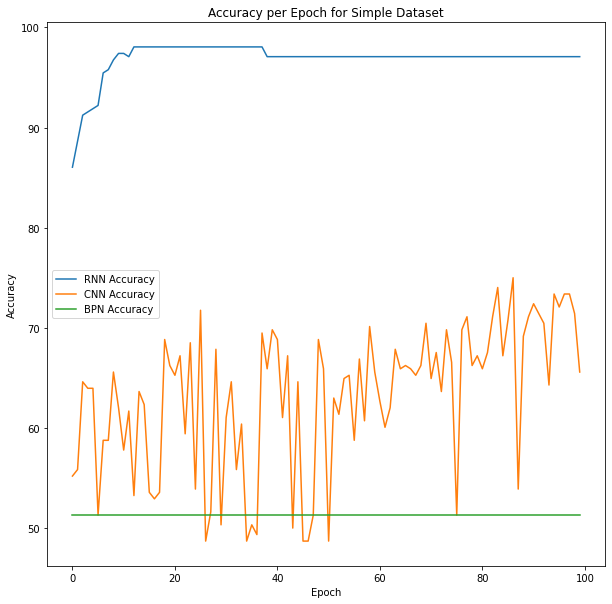

In [161]:
plt.figure(figsize=(10, 10))
plt.title("Accuracy per Epoch for Simple Dataset")
plt.plot([i * 100 for i in rnn_history.history["val_accuracy"]], label="RNN Accuracy")
plt.plot([i * 100 for i in cnn_history.history["val_accuracy"]], label="CNN Accuracy")
plt.plot(bpn.accuracy_epochs, label="BPN Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/upload_handwritten/trainingSample',
        target_size=(INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE),
        class_mode="sparse",
)

Found 600 images belonging to 10 classes.


In [20]:
class_names = list(train_generator.class_indices.keys())
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [21]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/upload_handwritten/testSample',
        target_size=(INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE),
        class_mode="sparse"
)

Found 381 images belonging to 10 classes.


In [22]:
rnn_history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=100
)

Streaming output truncated to the last 5000 lines.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 60/100
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_7158 in device /job:localhost/replica:0/task:0/device:CPU:0
 1/19 [>........

In [26]:
cnn_history = cnn_model2.fit(
    train_generator,
    validation_data=test_generator,
    epochs=100
)

Streaming output truncated to the last 5000 lines.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 60/100
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_23336 in device /job:localhost/replica:0/task:0/device:CPU:0
 1/19 [>.......

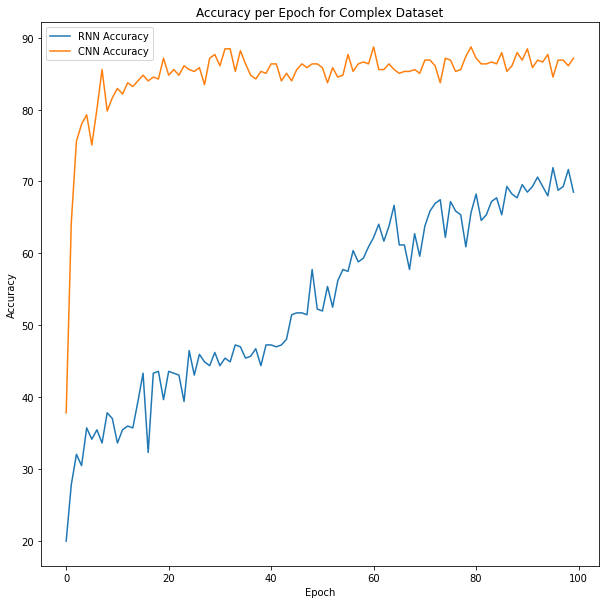

In [27]:
plt.figure(figsize=(10, 10))
plt.title("Accuracy per Epoch for Complex Dataset")
plt.plot([i * 100 for i in rnn_history.history["val_accuracy"]], label="RNN Accuracy")
plt.plot([i * 100 for i in cnn_history.history["val_accuracy"]], label="CNN Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()